# Example Exploration

This activity is meant to serve as a motivator for your first project involving an **Exploratory Data Analysis** notebook posted to **GitHub**.  We will use the example of housing data frequently in the class.  This is an example drawn from the excellent book [Hands on Machine Learning with Python]() by Ariel Guron.  Our goal is to load and explore the data.  We have some missing values we want to consider, and also we want to brainstorm about new columns we can create.  Additionally, we want to explore the distributions of variables and transform any worthy of treatment.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sns

In [2]:
df = pd.read_csv('data/eda_data/cali_housing.csv', index_col = 0)

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [5]:
df.total_bedrooms.isna().sum()

207

In [6]:
df[df.total_bedrooms.isna()].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY


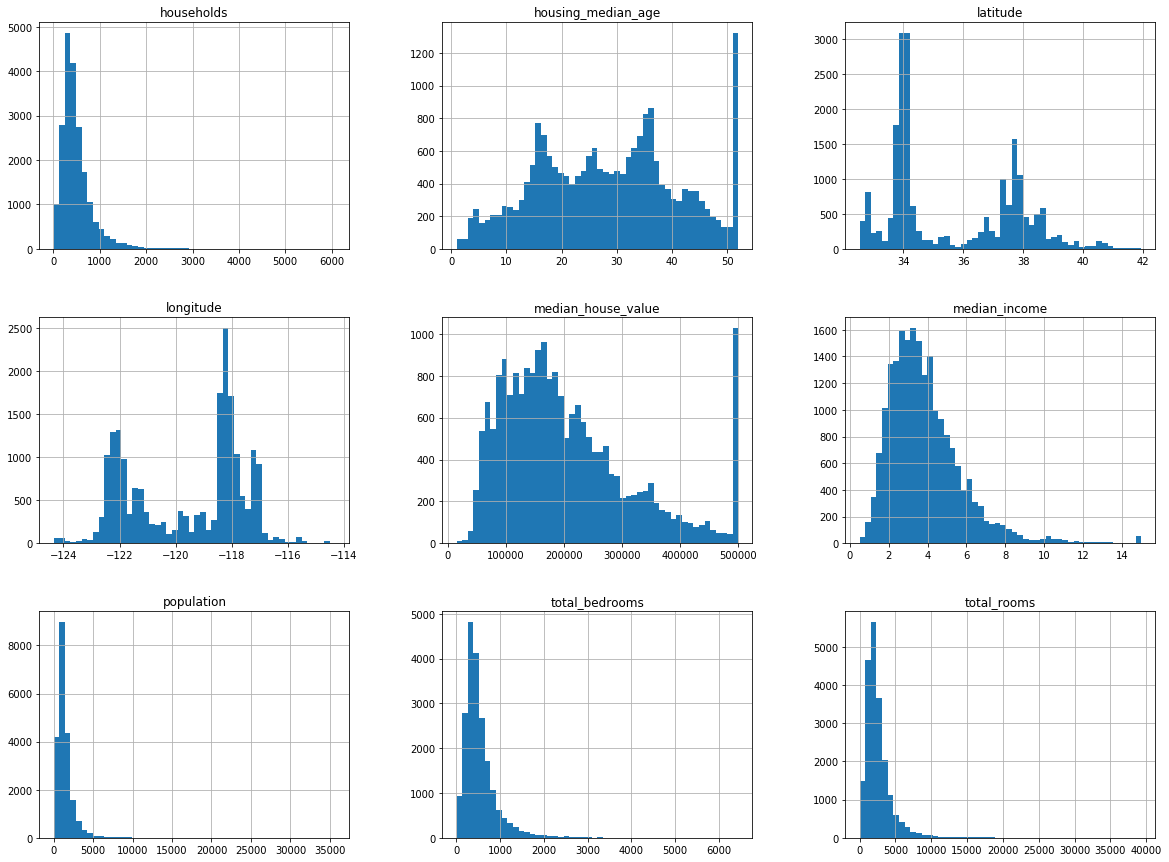

In [7]:
df.hist(bins=50, figsize=(20,15));

### Problem

1. Draw a scatter plot of the houses location, coloring them based on the median house value.
1. Transform the tail heavy distributions using mathematical operations.
2. Create three new columns:
   1. `rooms_per_household`
   2. `bedrooms_per_room`
   3. `population_per_household`
   
3. Drop values where na's are missing, assign this DataFrame to `dropped_houses`.
4. Replace missing values with mean or median values, assign this to `replaced_houses`.

The skew before was 4.147343450632158 
After transforming is 1.4224679968926055


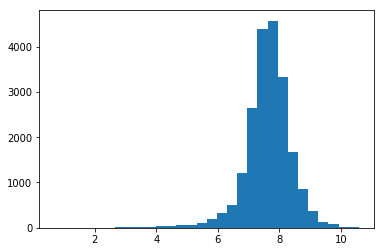

In [8]:
plt.hist(np.log( df['total_rooms']), bins = 30);
print('The skew before was', df['total_rooms'].skew(), '\nAfter transforming is', np.log(df['total_rooms'].skew()))

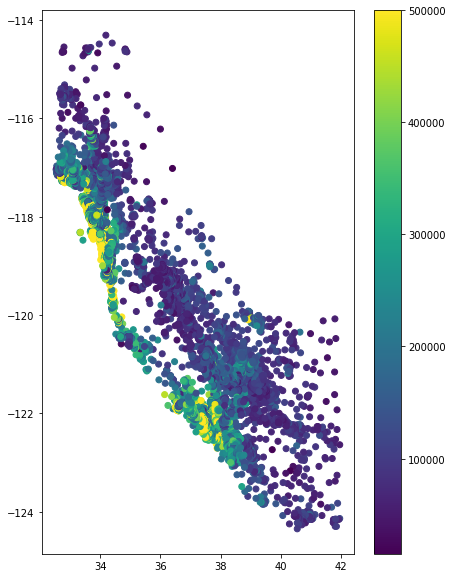

In [9]:
plt.figure(figsize = (7, 10))
plt.scatter(df.latitude, df.longitude, c = df.median_house_value)
plt.colorbar()

In [10]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [11]:
df['rooms_per_household'] = df.total_rooms/df.households
df['bedrooms_per_room'] = df.total_bedrooms/df.total_rooms
df['population_per_household'] = df.households/df.population

In [12]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,0.391304
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,0.473969
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,0.356855
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,0.392473
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,0.458407


In [13]:
corr = df.corr()

In [14]:
corr['median_house_value'].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.688075
population_per_household    0.264910
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

### Your EDA Project

1. A Jupyter Notebook titled `EDA_project_I.ipynb` housed in a **GitHub** repository specifically for projects in this class.
2. Clear Definition of the Data and Data Types
3. Visualizations and explorations of descriptive statistics
4. Transformations and Discussion
5. New Variables and Correlation Explorations
